## Introdução

### Objetivo da Análise
O problema em análise é o **desligamento de funcionários** (*attrition*) em uma empresa. O objetivo principal é identificar e entender os fatores que levam os funcionários a deixarem o seu trabalho para que medidas possam ser tomadas para resolver esse problema.

### Descrição da Base
- **Age**: Idade do funcionário.
- **Attrition**: Indica se o funcionário deixou a empresa (`Yes`) ou não (`No`).
- **Department**: O departamento em que o funcionário trabalha, como Vendas (*Sales*) ou Pesquisa e Desenvolvimento (*Research & Development*).
- **DistanceFromHome**: Distância, em milhas, da casa do funcionário até o local de trabalho.
- **Education**: Nível de educação do funcionário, representado por um valor numérico (1 = Ensino Médio, 2 = Graduação, etc.).
- **EducationField**: Campo de estudo em que o funcionário se formou, como Ciências da Vida, Medicina, entre outros.
- **EnvironmentSatisfaction**: Grau de satisfação do funcionário com o ambiente de trabalho (1 = Baixa, 4 = Alta).
- **JobSatisfaction**: Nível de satisfação do funcionário com seu trabalho atual (1 = Baixa, 4 = Alta).
- **MaritalStatus**: Estado civil do funcionário (Solteiro, Casado, etc.).
- **MonthlyIncome**: Renda mensal do funcionário.
- **NumCompaniesWorked**: Número de empresas em que o funcionário já trabalhou anteriormente.
- **WorkLifeBalance**: Equilíbrio percebido entre vida pessoal e trabalho (1 = Pobre, 4 = Excelente).
- **YearsAtCompany**: Quantidade de anos que o funcionário trabalhou na empresa atual.

## Imports

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder

## Leitura da Base

In [64]:
df = pd.read_csv("attrition_data.csv")
display(df.head())

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


## Pré-Processamento

#### Visão Geral Inicial da Base
**Total de registros**: 1470

**Total de colunas**: 13

**Obs:** Nenhuma coluna tem valores nulos.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


## Análises

### Distribuição de Desligamento

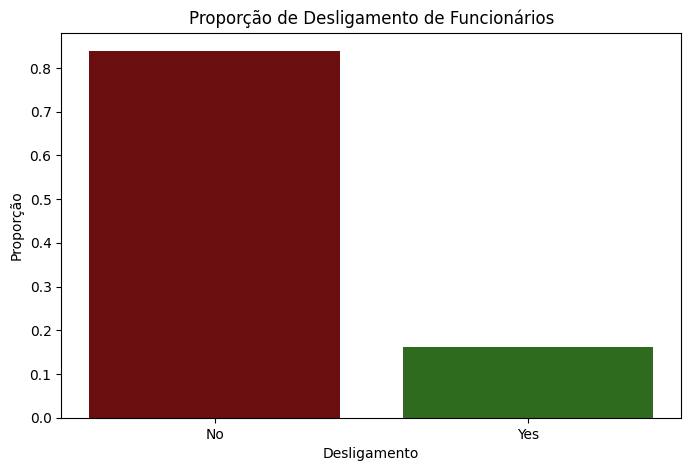

In [66]:
attrition_counts = df['Attrition'].value_counts(normalize=True) # Calculando as proporções de "sim" e "não"
attrition_counts = attrition_counts.reset_index() # resetando o index para transformar o Series em um DataFrame
attrition_counts.columns = ['Desligamento', 'Proporção'] # Renomeando as colunas


plt.figure(figsize=(8, 5)) # Definindo o tamanho da figura
plt.bar(attrition_counts['Desligamento'], attrition_counts['Proporção'], color=['#6B0E10', '#2F6B1E']) # Configurando gráfico de barras
plt.title('Proporção de Desligamento de Funcionários') # Definindo o título
plt.xlabel('Desligamento') # Definindo o nome do eixo X
plt.ylabel('Proporção') # Definindo o nome do eixo Y
plt.show() # Mostrando gráfico

### Fatores relacionados ao desligamento

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('categories', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))   # Codificando colunas categóricas
    ],
    remainder='passthrough',
    verbose_feature_names_out= False 
)

In [68]:
df_encode = df
df_encode = pd.DataFrame(preprocessor.fit_transform(df_encode), columns=preprocessor.get_feature_names_out())
display(df_encode)

,Attrition,Department,EducationField,MaritalStatus,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,1.0,2.0,1.0,2.0,41.0,1.0,2.0,2.0,4.0,5993.0,8.0,1.0,6.0
1,0.0,1.0,1.0,1.0,49.0,8.0,1.0,3.0,2.0,5130.0,1.0,3.0,10.0
2,1.0,1.0,4.0,2.0,37.0,2.0,2.0,4.0,3.0,2090.0,6.0,3.0,0.0
3,0.0,1.0,1.0,1.0,33.0,3.0,4.0,4.0,3.0,2909.0,1.0,3.0,8.0
4,0.0,1.0,3.0,1.0,27.0,2.0,1.0,1.0,2.0,3468.0,9.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,3.0,1.0,36.0,23.0,2.0,3.0,4.0,2571.0,4.0,3.0,5.0
1466,0.0,1.0,3.0,1.0,39.0,6.0,1.0,4.0,1.0,9991.0,4.0,3.0,7.0
1467,0.0,1.0,1.0,1.0,27.0,4.0,3.0,2.0,2.0,6142.0,1.0,3.0,6.0
1468,0.0,2.0,3.0,1.0,49.0,2.0,3.0,4.0,2.0,5390.0,2.0,2.0,9.0


In [69]:
matriz_corr = df_encode.corr()
display(matriz_corr.head())

,Attrition,Department,EducationField,MaritalStatus,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Attrition,1.000000,0.063991,0.026846,0.162070,-0.159205,0.077924,-0.031373,-0.103369,-0.103481,-0.159840,0.043494,-0.063939,-0.134392
Department,0.063991,1.000000,0.013720,0.056073,-0.031882,0.017225,0.007996,-0.019395,0.021001,0.053130,-0.035882,0.026383,0.022920
EducationField,0.026846,0.013720,1.000000,0.014420,-0.040873,0.002013,-0.039592,0.043163,-0.034401,-0.041070,-0.008663,0.041191,-0.018692
MaritalStatus,0.162070,0.056073,0.014420,1.000000,-0.095029,-0.014437,0.004053,-0.003593,0.024360,-0.075450,-0.035505,0.014708,-0.059986
Age,-0.159205,-0.031882,-0.040873,-0.095029,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309


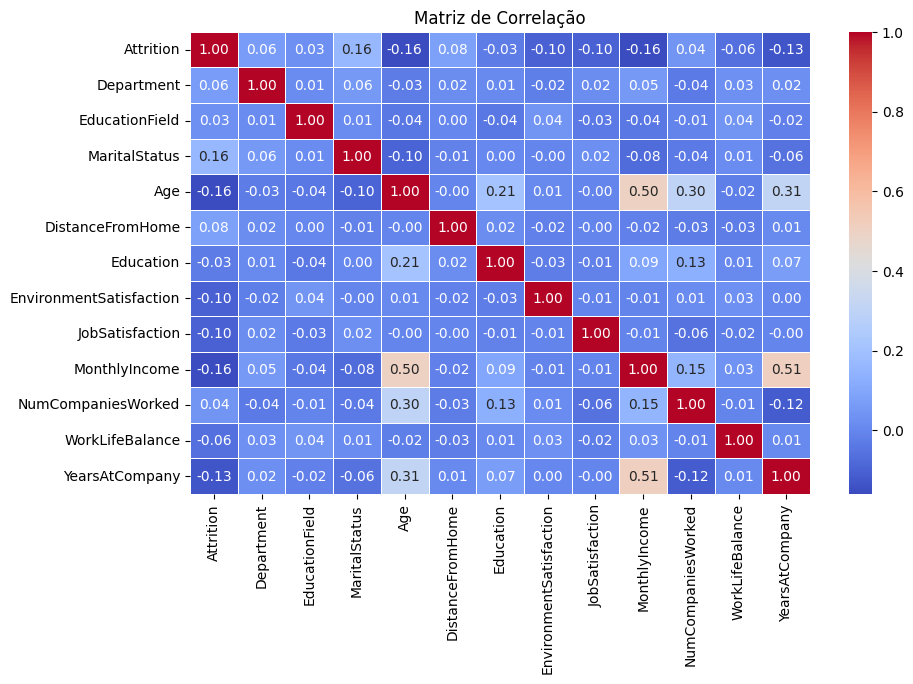

In [70]:
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()